<a href="https://colab.research.google.com/github/TheCodeJutsu/TrabajoPracticoVS/blob/main/TrabajoPracticoVS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Trabajo Práctico

Asignatura: Visualización de Datos

Enlace: https://js-yfhakw.stackblitz.io/ 

MBID

# Instalación de librerías

En este caso se tuvo que actualizar la versión de matploit para la impresión de las etiquetas del gráfico de barras

In [2]:
#!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 485 kB/s 
     |████████████████████████████████| 965 kB 45.0 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


# Inserción de librerías

In [1]:
import pandas as pd
import io
import requests
import seaborn as sns
import timeit
import matplotlib.pyplot as plt
from google.colab import drive

# Operación de Montaje 

El dataset propuesto se cargó de manera local a través del Drive asociado a la cuenta

In [2]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Carga del DataSet

In [3]:
# Importar la librería necesaria para cargar el archivo 
import pandas as pd
# Definir data, con el fin de almacenar el dataframe a preprocesar
prodata = pd.read_csv('/content/drive/MyDrive/dataset/ProDataset.csv', sep=',')

# Muestra del Dartaset


In [4]:
prodata.head()

,Unnamed: 0,cultivo,grupo_cultivo,subgrupo_cultivo,desagregacion_regional_yo_sistema_productivo,ciclo_cultivo,anio,area_sembrada(ha),area_cosechada(ha),produccion(t),estado_fisico_produccion,rendimiento(tha)
0,0,ACELGA,HORTALIZAS,ACELGA,ACELGA,TRANSITORIO,2006,2.0,1.0,1.000000,FRUTO FRESCO,1.00
1,1,ACELGA,HORTALIZAS,ACELGA,ACELGA,TRANSITORIO,2006,82.0,80.0,181.962057,FRUTO FRESCO,18.00
2,2,ACELGA,HORTALIZAS,ACELGA,ACELGA,TRANSITORIO,2006,2.0,2.0,26.000000,FRUTO FRESCO,17.33
3,3,ACELGA,HORTALIZAS,ACELGA,ACELGA,TRANSITORIO,2006,3.0,3.0,48.000000,FRUTO FRESCO,16.00
4,4,ACELGA,HORTALIZAS,ACELGA,ACELGA,TRANSITORIO,2006,1.0,1.0,5.000000,FRUTO FRESCO,10.00


# Información General del DaraSet

In [5]:
prodata.describe()

,Unnamed: 0,anio,area_sembrada(ha),area_cosechada(ha),produccion(t),rendimiento(tha)
count,206068.000000,206068.000000,206068.000000,206068.000000,206068.000000,206068.000000
mean,103033.500000,2012.455976,108.077342,98.686879,181.962057,9.238820
std,59486.851973,3.479113,173.845031,168.220867,204.388840,14.764118
min,0.000000,2006.000000,0.000000,0.000000,0.000000,0.030000
25%,51516.750000,2009.000000,10.000000,8.000000,32.000000,1.540000
50%,103033.500000,2013.000000,35.000000,30.000000,140.000000,5.290000
75%,154550.250000,2015.000000,108.077342,98.686879,194.000000,11.000000
max,206067.000000,2018.000000,999.000000,999.000000,999.000000,246.000000


In [6]:
prodata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206068 entries, 0 to 206067
Data columns (total 12 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   Unnamed: 0                                    206068 non-null  int64  
 1   cultivo                                       206068 non-null  object 
 2   grupo_cultivo                                 206068 non-null  object 
 3   subgrupo_cultivo                              206068 non-null  object 
 4   desagregacion_regional_yo_sistema_productivo  206068 non-null  object 
 5   ciclo_cultivo                                 206068 non-null  object 
 6   anio                                          206068 non-null  int64  
 7   area_sembrada(ha)                             206068 non-null  float64
 8   area_cosechada(ha)                            206068 non-null  float64
 9   produccion(t)                                 20

# Preprocesamiento del DataSet

En esta sección de tuvo que eliminar la columna seleccionada en función de la optimización del conjunto de datos

In [7]:
prodata.drop(['Unnamed: 0'], axis=1)

,cultivo,grupo_cultivo,subgrupo_cultivo,desagregacion_regional_yo_sistema_productivo,ciclo_cultivo,anio,area_sembrada(ha),area_cosechada(ha),produccion(t),estado_fisico_produccion,rendimiento(tha)
0,ACELGA,HORTALIZAS,ACELGA,ACELGA,TRANSITORIO,2006,2.0,1.0,1.000000,FRUTO FRESCO,1.00
1,ACELGA,HORTALIZAS,ACELGA,ACELGA,TRANSITORIO,2006,82.0,80.0,181.962057,FRUTO FRESCO,18.00
2,ACELGA,HORTALIZAS,ACELGA,ACELGA,TRANSITORIO,2006,2.0,2.0,26.000000,FRUTO FRESCO,17.33
3,ACELGA,HORTALIZAS,ACELGA,ACELGA,TRANSITORIO,2006,3.0,3.0,48.000000,FRUTO FRESCO,16.00
4,ACELGA,HORTALIZAS,ACELGA,ACELGA,TRANSITORIO,2006,1.0,1.0,5.000000,FRUTO FRESCO,10.00
...,...,...,...,...,...,...,...,...,...,...,...
206063,CALABACIN,HORTALIZAS,CALABACIN,ZUCCHINI,TRANSITORIO,2017,20.0,18.0,180.000000,HORTALIZA FRESCA,10.00
206064,CALABACIN,HORTALIZAS,CALABACIN,ZUCCHINI,TRANSITORIO,2017,2.0,2.0,8.000000,HORTALIZA FRESCA,5.00
206065,CALABACIN,HORTALIZAS,CALABACIN,ZUCCHINI,TRANSITORIO,2018,15.0,15.0,150.000000,HORTALIZA FRESCA,10.00
206066,CALABACIN,HORTALIZAS,CALABACIN,ZUCCHINI,TRANSITORIO,2018,6.0,6.0,50.000000,HORTALIZA FRESCA,8.27


# Generación de gráficos

Abstracción de categorías

In [8]:
categories = prodata['grupo_cultivo'].value_counts(ascending=False).index
categories

Index(['FRUTALES', 'CEREALES', 'HORTALIZAS', 'TUBERCULOS Y PLATANOS',
       'LEGUMINOSAS', 'OTROS PERMANENTES', 'FIBRAS', 'OLEAGINOSAS',
       'PLANTAS AROMATICAS, CONDIMENTARIAS Y MEDICINALES', 'FORESTALES',
       'FLORES Y FOLLAJES', 'OTROS TRANSITORIOS', 'HONGOS'],
      dtype='object')

# Gráfico de Barras

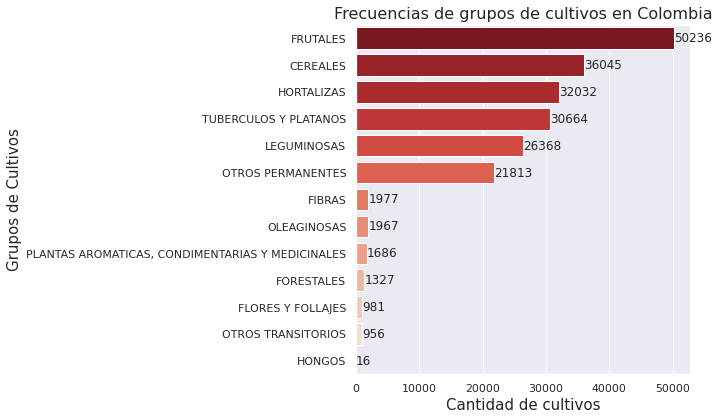

In [9]:
plt.figure(figsize=(10,6))
#Distribución de las clases
sns.set(style='darkgrid')
ax = sns.countplot(y="grupo_cultivo", data=prodata, palette = "Reds_r", order=prodata['grupo_cultivo'].value_counts(ascending=False).index)
ax.bar_label(ax.containers[0], label_type='edge')
# set labels
plt.xlabel("Cantidad de cultivos", size=15)
plt.ylabel("Grupos de Cultivos", size=15)
plt.title("Frecuencias de grupos de cultivos en Colombia", size=16)
plt.tight_layout()
plt.savefig("Graph1.png", dpi=100)

# Renombrado de columnas

In [12]:
prodata.rename(columns={'area_sembrada(ha)':'area_sembrada_ha',
                        'area_cosechada(ha)':'area_cosechada_ha',
                        'produccion(t)':'produccion_t',
                        'rendimiento(tha)':'rendimiento_tha'},
               inplace=True)

In [13]:
prodata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206068 entries, 0 to 206067
Data columns (total 12 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   Unnamed: 0                                    206068 non-null  int64  
 1   cultivo                                       206068 non-null  object 
 2   grupo_cultivo                                 206068 non-null  object 
 3   subgrupo_cultivo                              206068 non-null  object 
 4   desagregacion_regional_yo_sistema_productivo  206068 non-null  object 
 5   ciclo_cultivo                                 206068 non-null  object 
 6   anio                                          206068 non-null  int64  
 7   area_sembrada_ha                              206068 non-null  float64
 8   area_cosechada_ha                             206068 non-null  float64
 9   produccion_t                                  20

# Función de Densidad Producción

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


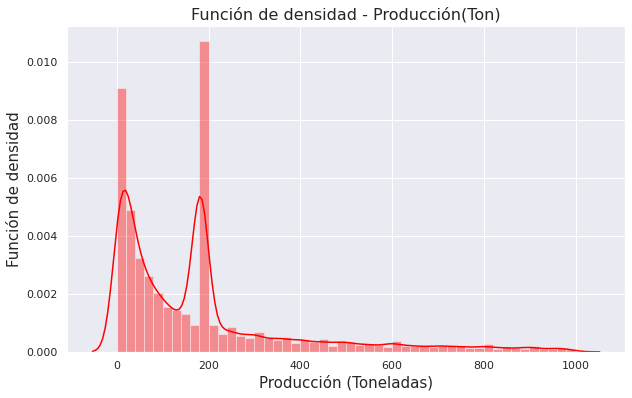

<Figure size 432x288 with 0 Axes>

In [14]:
#Distribución de la edad(ege)
plt.figure(figsize=(10,6))
sns.distplot(prodata.produccion_t.dropna( ), color='Red')
plt.xlabel("Producción (Toneladas)", size=15)
plt.ylabel("Función de densidad", size=15)
plt.title("Función de densidad - Producción(Ton)", size=16)
plt.show( )
plt.savefig("Graph1.png", dpi=100)

# Función de densidad Área Cosechada

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


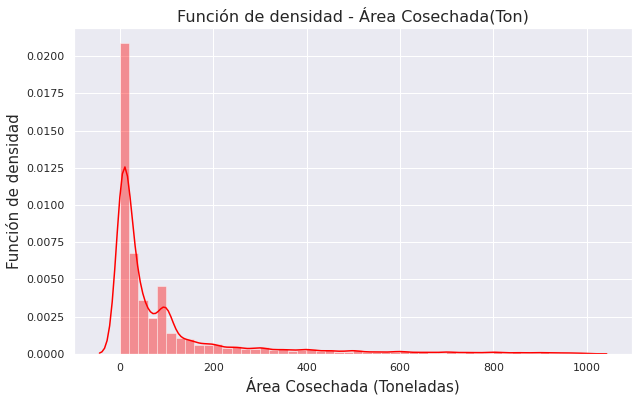

<Figure size 432x288 with 0 Axes>

In [15]:
plt.figure(figsize=(10,6))
sns.distplot(prodata.area_cosechada_ha.dropna( ), color='Red')
plt.xlabel("Área Cosechada (Toneladas)", size=15)
plt.ylabel("Función de densidad", size=15)
plt.title("Función de densidad - Área Cosechada(Ton)", size=16)
plt.show( )
plt.savefig("Graph3.png", dpi=100)

# Función de densidad Área Sembrada/Cosechada

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


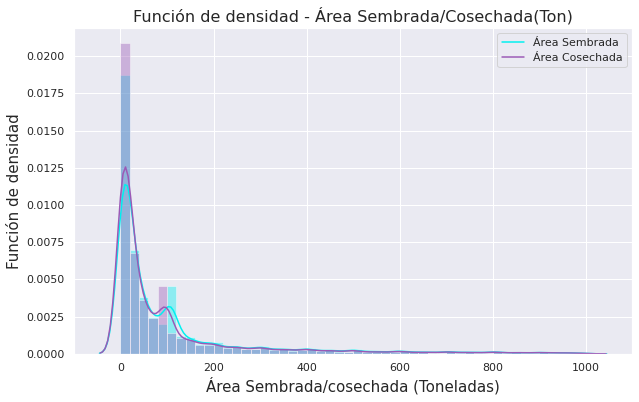

<Figure size 432x288 with 0 Axes>

In [16]:
from scipy.stats import alpha
#Distribución de la edad(ege)
plt.figure(figsize=(10,6))
p = sns.distplot(prodata.area_sembrada_ha.dropna( ), color='#00f0f0')
g = sns.distplot(prodata.area_cosechada_ha.dropna( ), color='#9b59b6')
plt.xlabel("Área Sembrada/cosechada (Toneladas)", size=15)
plt.ylabel("Función de densidad", size=15)
plt.title("Función de densidad - Área Sembrada/Cosechada(Ton)", size=16)
plt.legend(labels=["Área Sembrada","Área Cosechada"])
plt.show( )
plt.savefig("Graph4.png", dpi=100)

# Función de densidad Rendimiento

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


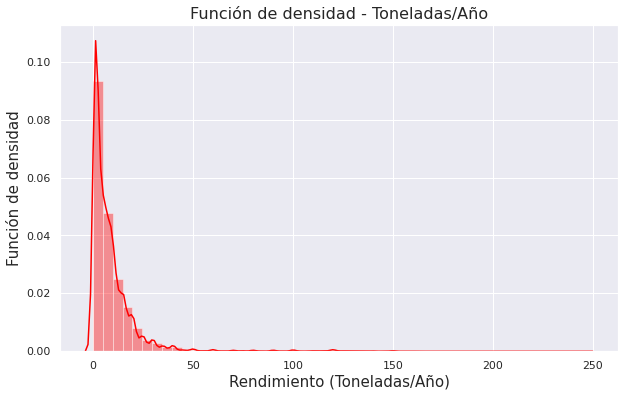

<Figure size 432x288 with 0 Axes>

In [17]:
#Distribución de la edad(ege)
plt.figure(figsize=(10,6))
sns.distplot(prodata.rendimiento_tha.dropna( ), color='Red')
plt.xlabel("Rendimiento (Toneladas/Año)", size=15)
plt.ylabel("Función de densidad", size=15)
plt.title("Función de densidad - Toneladas/Año", size=16)
plt.show( )
plt.savefig("Graph3.png", dpi=100)

In [ ]:
#Cambiamos el font
sns.set(font_scale=1)

#FacetGrid - Construir una matriz de gráficos
g = sns.FacetGrid(prodata, row='cultivo',col='grupo_cultivo')
g.map(sns.distplot, "produccion_t")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 